<a href="https://colab.research.google.com/github/issacridhin/Reinforcement_learning/blob/main/2348546_Lab2_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
k = 10  # Number of arms
steps = 1000  # Number of time steps
epsilon = 0.1  # Exploration probability
mean_change = 0.01  # Rate of change of arm means

In [3]:
# Initialize bandit means and action-value estimates
true_means = np.random.normal(0, 1, k)  # true means for each arm
q_values = np.zeros(k)  # Estimated value for each arm
action_counts = np.zeros(k)  # Counts of pulls for each arm

In [4]:
# Select action using epsilon-greedy
def select_action(q_values, epsilon):
    if np.random.rand() < epsilon:     # Explore
        return np.random.randint(0, k)
    else:                              # Exploit
        return np.argmax(q_values)

In [5]:
# To simulate pulling an arm (nonstationary rewards)
def pull_arm(arm):
    global true_means
    reward = np.random.normal(true_means[arm], 1)  # Reward is drawn from a normal distribution
    true_means += np.random.normal(0, mean_change, k)  # Update true means for nonstationarity
    return reward

In [6]:
rewards = np.zeros(steps)
for t in range(steps):
    arm = select_action(q_values, epsilon)
    reward = pull_arm(arm)

    # Update action counts
    action_counts[arm] += 1

    # Incremental update to the estimated value (Q-value) for the chosen arm
    q_values[arm] += (reward - q_values[arm]) / action_counts[arm]

    # Store the reward
    rewards[t] = reward

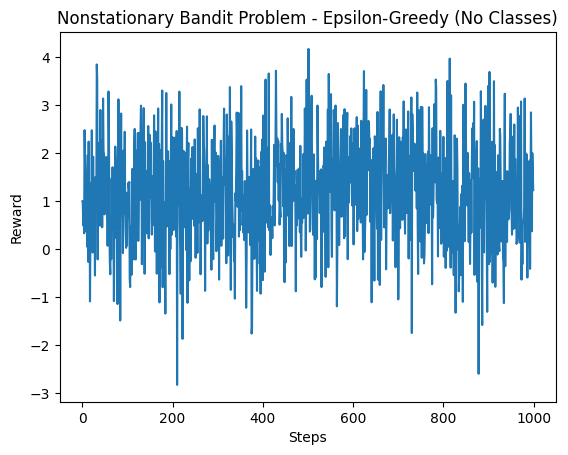

In [7]:
plt.plot(rewards)
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('Nonstationary Bandit Problem - Epsilon-Greedy (No Classes)')
plt.show()

The plot shows how the rewards fluctuate over time as the agent interacts with the nonstationary environment.